In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics as sta
import seaborn as sns
import matplotlib.pyplot as plt
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
sns.set_style("darkgrid")

### **HW-U2-1**: 对于样本：x=[25,27,25,24,27,29,29,20,21,25,30,35]

In [4]:
x=[25,27,25,24,27,29,29,20,21,25,30,35]
x

[25, 27, 25, 24, 27, 29, 29, 20, 21, 25, 30, 35]

#### (1)利用Python先将这个序列按升序排列，然后用statistics模块，分别给出这个序列的mean, mode, median, upper_median, low_median；

In [5]:
x.sort()
x

[20, 21, 24, 25, 25, 25, 27, 27, 29, 29, 30, 35]

In [6]:
sta.mean(x)
sta.mode(x)
sta.median(x)
sta.median_high(x)
sta.median_low(x)

26.416666666666668

25

26.0

27

25

#### (2) 针对x序列，利用python的函数numpy.mean(x), statistics.mean(x)计算均值，看看是否相等，如果不等，请解释。

In [7]:
np.mean(x)
sta.mean(x)
x_array=np.array(x)
np.mean(x_array)
sta.mean(x_array)

26.416666666666668

26.416666666666668

26.416666666666668

26

可以看到:
1. x序列利用python的函数numpy.mean(x), statistics.mean(x)计算出的均值相等。
2. 将其转换为numpy.ndarray后计算出的均值不等

In [8]:
x_array.dtype
type(x[0])

dtype('int32')

int

其原因可能是numpy.ndarray和Python内置格式中的数据类型不同，statistic对numpy.ndarray求均值时由于int32类型直接作了取整操作。

#### (3）利用pandas.DataFrame将x转换成数据表df，然后利用数据表的df.describe()给出x的描述性统计；并与scipy.stats.describe(x)的输出结果比较; 特别地比较其中的方差/标准差，并与numpy.var(x)或numpy.std(x) 比较看看是否一致，如果有差异，请解释。

In [9]:
df=pd.DataFrame({"X":x})
df.describe()

,X
count,12.000000
mean,26.416667
std,4.077841
min,20.000000
25%,24.750000
50%,26.000000
75%,29.000000
max,35.000000


In [10]:
stats.describe(x)
np.var(x)
np.var(x,ddof=1)

DescribeResult(nobs=12, minmax=(20, 35), mean=26.416666666666668, variance=16.628787878787875, skewness=0.37455184608977043, kurtosis=-0.02881305099081022)

15.243055555555552

16.628787878787875

两者结果不同，原因是stats.describe()计算的是样本方差，np.var()计算的是总体方差。

In [11]:
df.describe()
np.std(x)
np.std(x,ddof=1)

,X
count,12.000000
mean,26.416667
std,4.077841
min,20.000000
25%,24.750000
50%,26.000000
75%,29.000000
max,35.000000


3.9042355917074922

4.077841080619483

两者结果也不同，原因是df.describe()计算的是样本标准差，np.var()计算的是总体标准差。

### HW-U2-2: 针对问题HW-U2-1中的数据x:

#### (1) 利用stats.tmean()计算x中范围在[24,30)内的值的均值, 并用np.mean()进行验证

In [12]:
stats.tmean(x,[24,30],inclusive=(True,False))
np.mean([24,25, 25, 25, 27, 27, 29, 29])
np.mean(x)

26.375

26.375

26.416666666666668

#### (2)利用两种方法对上面的数据x截取最大10% 和最小10%后计算均值：(a) stats.trim_mean()(b)  stats.trimboth, np.mean(),并将计算的结果进行比较；

In [13]:
stats.trim_mean(x,0.1)
np.mean(stats.trimboth(x,0.1))

26.2

26.2

### HW-U2-3:time_series_19-covid-Deaths-Mar-15.csv 这是截止3/15日的数据全球covid-19死亡数据报告。

#### （1） 请根据这个数据文件画出1/22-3/15期间整个中国每日新报告的死亡病例；

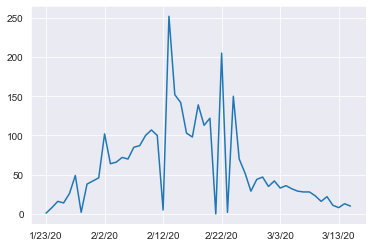

In [14]:
df=pd.read_csv('time_series_19-covid-Deaths-Mar-15.csv')
df=df.groupby(["Country/Region"]).sum()
df=df.loc["China","1/22/20":"3/15/20"]
value=[]
for i in range(len(df)-1):
    value.append(df.values[i+1]-df.values[i])
data=pd.Series(value,index=df.index[1:])
data.plot()

#### （2） 计算1/22-3/15期间整个中国每日新报告的死亡病例数据的skewness , kurtosis (fisher) 值；

In [15]:
stats.skew(data.values)
stats.kurtosis(data.values)

1.351808123400179

1.839410067721043

#### （3） 如果将数据中变化比较大的日期（比如<=5, 或>=150）作为outliers去掉，重新计算skewness , kurtosis，根据结果评估一下这个数据的正态性。

In [16]:
data1=data[data.values>5]
stats.skew(data1)
stats.kurtosis(data1)

1.3543571077255594

1.827630952069665

In [17]:
data2=data[data.values<150]
stats.skew(data2)
stats.kurtosis(data2)

0.709423012821765

-0.5646552353924768

可以看到，去除较小值后，数据的正态性变化不明显。
去除较大值后，数据正态性明显增加，skewness和kurtosis都显著更接近0

### HW-U2-4, 变异系数（coefficient of variation, cv )和熵 （entropy)

#### (1）请计算上一题数据中的1/22-3/15日期间中国每日新增死亡病例的cv

In [18]:
cv=np.std(data,ddof=1)/np.mean(data)
cv

0.9059307542663461

#### (2)  请根据entropy的定义公式，以及Python 函数scipy.stats.entropy() 分别计算概率P={1/4,1/12, 1/6, 1/6 ，1/3}的熵 （对数以2为底）

In [19]:
p=[1/4,1/12,1/6,1/6,1/3]
probability=[]
prob=(pd.Series(p).value_counts().values)/len(p)
prob

array([0.4, 0.2, 0.2, 0.2])

In [20]:
stats.entropy(prob,base=2) 
result=0
for pro in prob:
    result-=pro*math.log2(pro)
result

1.9219280948873625

1.9219280948873623

### HW-U2-5, Grouped Data 有一批30只实验rats, 重量分布如下表, 请

In [21]:
weight=np.array([275,225,175,125])
freq=np.array([5,10,5,10])

#### （1） 根据mean, mode, median, std, var的公式计算这些样本的描述性统计量；

In [22]:
# mean
my_mean=0
for i in range(len(weight)):
    my_mean+=weight[i]*freq[i]
my_mean=my_mean/freq.sum()
my_mean

191.66666666666666

In [23]:
# mode
my_mode=weight[np.argmax(freq)]
my_mode

225

In [24]:
# median
tmp=pd.Series(weight,index=freq).sort_values()
weight_sorted=tmp.values
freq_sorted=tmp.index
weight_str=''

for i in range(len(weight)):
    weight_str+=(str(weight_sorted[i])+',')*freq_sorted[i]

weight_list=weight_str.strip(',').split(',') 
weight_list=np.array(weight_list,dtype=int)
weight_list
length=len(weight_list)

if length%2==1:
    my_median=weight_list[length/2]
else :
    pos=int(length/2)
    my_median=(weight_list[pos-1]+weight_list[pos])/2
my_median

array([125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 175, 175, 175,
       175, 175, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 275,
       275, 275, 275, 275])

200.0

In [25]:
# var
my_var=0
for i in range(len(weight)):
    my_var+=(weight[i]-my_mean)**2*freq[i]
my_var=my_var/(freq.sum()-1)
my_var

3160.9195402298856

In [26]:
# std
my_std=np.sqrt(my_var)
my_std

56.22205563860046

#### （2） 根据demo程序的mean_, mode_, median_, std_, var_ 程序计算，并作对比；

In [27]:
### calculating the mean, std, var of grouped data
import numpy as np

def mean_(val, freq):
    return np.average(val, weights = freq)

def median_(val, freq):
    ord = np.argsort(val)
    cdf = np.cumsum(freq[ord])
    return val[ord][np.searchsorted(cdf, cdf[-1] // 2)]

def mode_(val, freq): #in the strictest sense, assuming unique mode
    return val[np.argmax(freq)]

def var_(val, freq):
    avg = mean_(val, freq)
    dev = freq * (val - avg) ** 2
    return dev.sum() / (freq.sum() - 1)

def std_(val, freq):
    return np.sqrt(var_(val, freq))

In [28]:
mean_(weight,freq)
median_(weight,freq)
mode_(weight,freq)
var_(weight,freq)
std_(weight,freq)

191.66666666666666

175

225

3160.9195402298856

56.22205563860046

两者的mean，mode，var，std都相同，但是median_取了偶数个数据中中位数的前面一个，而用公式计算出的求了最中间两个数的平均值，所以答案有差异